# Exercise Group - Chapter 1

Below you find exercises for Chapter 1. These exercises will prepare you in particular for the obligatory mid-term tests. The purpose of the prepared code snippets below is to give you some helpful structure for coding by predefining some useful variable names, but you do not need to use these prepared code snippets and prepared variable names if you do not want to. Do not hestitate to use the function `help()` to print the documentation of the functions that you need. If you are stuck, please ask one of the supervisors present.

In the shared folder you will find a subfolder `data` containing important time series. You may copy them to your "*my_materials*" folder in order to import the data from there if you like.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import os
os.getcwd() # --> get the path

'/home/jovyan/my_materials'

<br><br>

# Topic 1: The Normal Distribution

## Step 1: Compute the Log-Returns

The executive board of a bank is unhappy with the risk management department and someone suggest to just use the normal distribution instead of all these complicated mathematical models, because they heard that "log-returns are usually normal distributed". You get the task to prepare some figures that show why this is not a good idea.

**Task 1.1**: Import the time series `DAX_index.csv` containing daily index levels of the German DAX index between 03 January 2000 and 11 October 2024. Write a function that computes the daily log-returns from the index levels.

*Useful Python commands*: `np.genfromtxt`, `np.loadtxt`, `np.log`, `np.diff`

In [52]:
# Load data
data = np.genfromtxt('./DAX_index.csv', usecols=(1), delimiter=",", skip_header=1) #./ --> in diesem Verzeichnis

def log_returns(data):
    return np.diff(np.log(data))

In [53]:
data

array([ 6750.76,  6586.95,  6502.07, ..., 19254.93, 19210.9 , 19373.83])

In [4]:
# Output data
returns = log_returns(data)


**Task 1.2**: Draw a plot of the log-returns over time. In a separate plot, draw a histogram of the log-returns using 50 intervals.

*Useful Python commands*: `plt.plot`, `plt.hist`

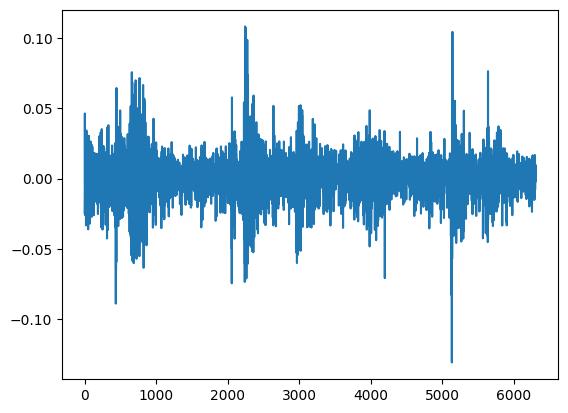

In [5]:
# Plot
plt.plot(returns)
plt.show()

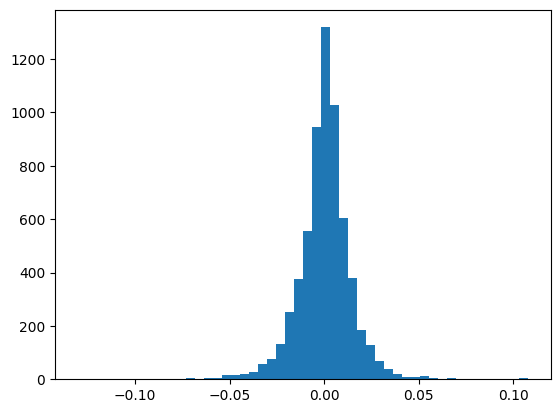

In [6]:
# Histogram
plt.hist(returns, bins=50)
plt.show()

**Task 1.3**: Assume that the log-returns are independent and identically distributed realisations from a normal distribution $N(\mu, \sigma^2)$ with mean $\mu$ and standard deviation $\sigma$. Compute estimators for $\mu$ and $\sigma$.

*Useful Python commands*: `np.mean`, `np.std`

In [7]:
# Get parameters
mu = np.mean(returns)
sigma = np.std(returns)

print(mu, sigma)

0.00016710542006344954 0.014291809616225523


**Task 1.4**: Plot the density of the $N(\mu, \sigma^2)$ distribution using your estimates for $\mu$ and $\sigma$ into the histogram from Task 1.2. Use the `density=True` argument to draw a histogram with heights compatible with the density. 

*Hint*: You may explicitly implement the density by yourself, or you may use the `pdf` method of the `scipy.stats.norm` class.

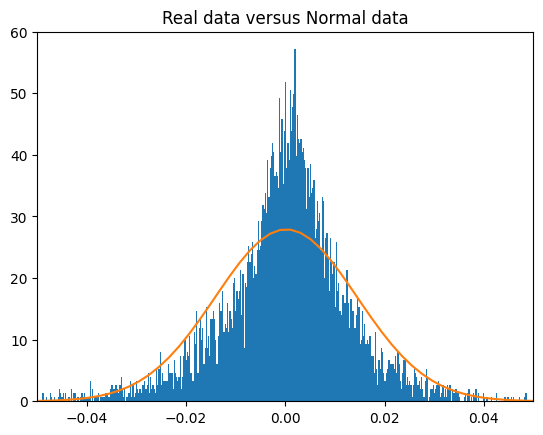

In [8]:
# Define pdf
x_random_range = np.linspace(-0.05, 0.05)
normal_pdf = stats.norm.pdf(x_random_range, loc=mu, scale=sigma)

#Output data
plt.hist(returns, bins=1000, density=True)
plt.plot(x_random_range, normal_pdf)
plt.title("Real data versus Normal data")
plt.xlim(-0.05, 0.05)
plt.show()

<br>

## Step 2: Perform a Monte-Carlo Simulation

To emphasise the difference between the normal distribution and the distribution of DAX returns, you want to add a Monte-Carlo simulation of normally distributed log-returns.

**Task 1.5**: Take your estimators from Task 1.3 and generate $N$ random samples of daily log-returns following the $N(\mu, \sigma^2)$ distribution, where $N$ is the length of your DAX returns time series. Use the `numpy` seed 5 for reproducibility.

*Useful Python commands*: `np.random.normal`, `np.random.seed`

In [9]:
np.random.seed(5)

In [10]:
# Get simulated (normal) returns
simulated_returns = np.random.normal(mu, sigma, len(returns))

**Task 1.6**: Draw a plot of the DAX log-returns over time as in Task 1.2. In a separate plot, draw a plot of your simulated log-returns over time. What can you observe?

*Useful Python commands:* `plt.plot`

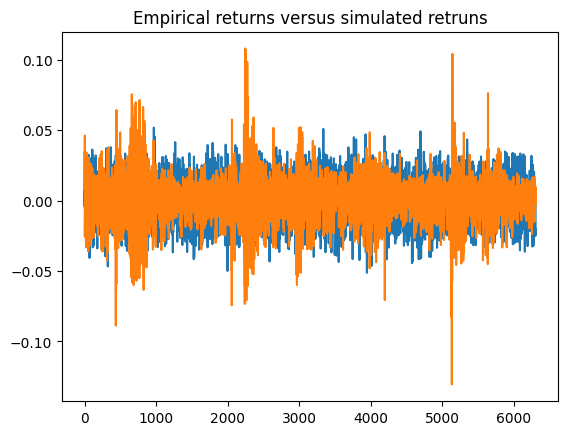

In [11]:
# Plot
plt.plot(simulated_returns)
plt.plot(returns)
plt.title("Empirical returns versus simulated retruns")
plt.show()

**Task 1.7**: Plot a histogram of your simulated log-returns from Task 1.5 using 20 intervals. As in Task 1.4, draw the density of the normal distribution with mean $\mu$ and standard deviation $\sigma$ into the histogram. Compare your plot to the plot from Task 1.4.

*Useful Python commands*: `plt.hist`

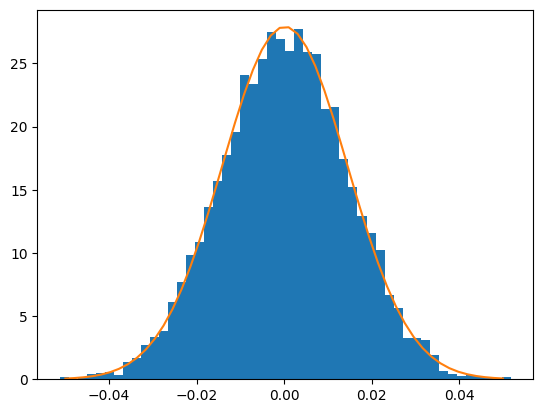

In [12]:
# Histogram
plt.hist(simulated_returns, bins=50, density=True)
plt.plot(x_random_range, normal_pdf)
plt.show()

**Task 1.8**: Compute the price process $(S_t)_{t \in \{0, \dots, N\}}$ corresponding to your simulated log-returns from Task 1.5. As an initial value $S_0$, use the initial index level of the DAX in your DAX time series (i.e. the DAX index level on 03 January 2000). Plot the price process and the DAX index process over time in a common plot.

*Useful Python commands*: `np.cumsum`, `np.cumprod`, `plt.plot`

In [13]:
# Correct notation for log-returns 

S_0 = data[0]

# Cumsum of simulated (log-returns)
S_t = S_0 * np.exp(np.cumsum(simulated_returns))

# Mathematical idea:
# - cumsum --> accumulated the total change on log scale; relative to initial price
# - exponetial cause opposite of logarithm. To obtain the price process
# - S_0 - some sort of starting value or scaling factor

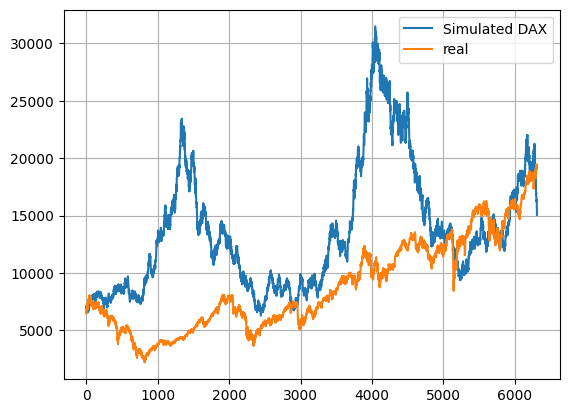

In [14]:
plt.plot(S_t, label="Simulated DAX")
plt.plot(data, label='real')

plt.legend()
plt.grid()
plt.show()

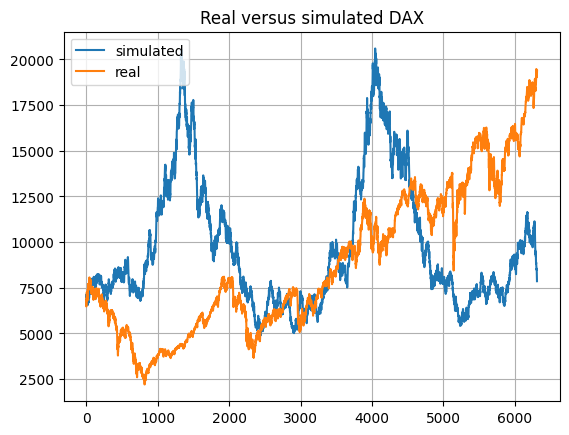

In [15]:
# model price process
S_0 = data[0]
S_T = S_0 * np.cumprod(1 + simulated_returns) # wrong solution!!!

# plot
plt.plot(S_T, label='simulated')
plt.plot(data, label='real')
plt.title("Real versus simulated DAX")
plt.legend(loc='upper left')
plt.grid()
plt.show()

<br><br>

# Topic 2: Losses and the Loss Operator (skript p.7)

## Step 1: Compute the Risk Factors

Consider a stock portfolio $(V_n)_{n \in \{0, \dots, N\}}$ with [4, 8, 15, 16, 23] shares of the German stocks [BMW, SAP, Volkswagen, Continental, Siemens]. For the purpose of risk management we chose as risk factors the logarithmic stock prices $Z_{n,i} := \log(S_{n,i})$.

**Task 2.1**: In the file `DAX_companies.csv` you find a time series of the five stocks between 03 January 2000 and 11 October 2024. Import the time series and compute the risk factors $Z_{n} = (Z_{n, 1}, \dots, Z_{n, 5})$.

*Useful Python commands*: `np.genfromtxt`, `np.loadtxt`, `np.log`

In [16]:
# Read in file
data_dax_comp = np.genfromtxt('./DAX_companies.csv', usecols=(1,2,3,4,5), delimiter=",", skip_header=1)

# Get risk factors (Z_n) --> matrix with prices
Z_n = np.log(data_dax_comp)

**Task 2.2**: Now, write a function `f` that computes the portfolio values $V_n = f_n(Z_n)$ from the risk factors as in Section 1.2.2.

*Useful Python commands*: `np.exp`, `np.dot`. *Hint:* Your function `f` resembling $f_n$ is independent of $n$ in the present setting.

In [17]:
# weights
alpha_weights = [4, 8, 15, 16, 23]

# portfolio
V_n = np.zeros(len(Z_n))
for i in range(len(V_n)):
    V_n[i] = np.dot(alpha_weights, np.exp(Z_n[i]))

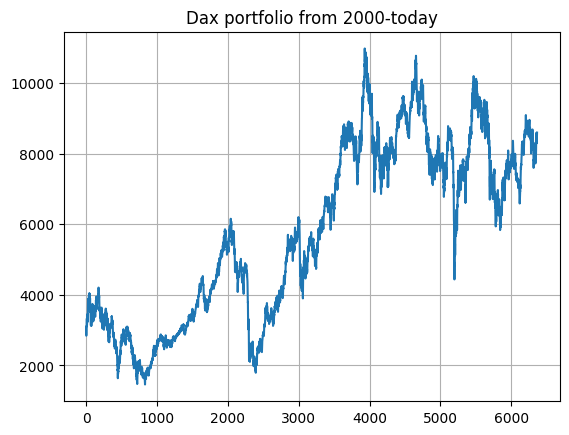

In [18]:
# plot
plt.plot(V_n, label="Dax portfolio")
plt.title("Dax portfolio from 2000-today")
plt.grid()
plt.show()

**Task 2.3**: Compute the risk factor changes $X_{n + 1} = Z_{n + 1} - Z_n$ from the risk factors for each $n \in \{0, \dots, N - 1\}$, where $N$ is the length of your time series.

*Useful Python commands*: `np.diff`

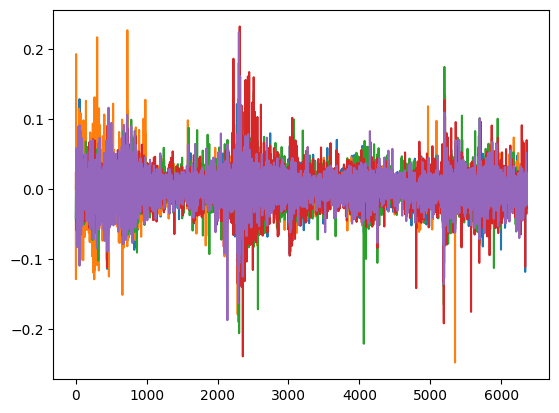

array([[-0.04118942, -0.04843658, -0.04561192,  0.        , -0.04124448],
       [-0.01998639, -0.12860575,  0.00664428,  0.02365457, -0.0344219 ],
       [-0.00324969,  0.03192488,  0.02129398,  0.01546447, -0.01230339],
       ...,
       [ 0.0122509 ,  0.01380669,  0.01032711,  0.0698038 ,  0.02347629],
       [-0.00728032, -0.00869781, -0.00343054, -0.00602613, -0.0059812 ],
       [-0.01128473,  0.01229968, -0.00516797,  0.00736035,  0.01343465]])

In [19]:
# Get risk factor changes (X_n_1)
X_n_1 = np.diff(Z_n, axis=0)
plt.plot(X_n_1)
plt.show()
X_n_1

<br>

# Step 2: Calculate the Losses

 We now want to compute the losses of our portfolio from the risk factor changes. Before you program this, try to answer the following question for yourself. After you thought about it you can click on the question to reveal the answer.

<details>
  <summary>Why does it make sense to compute the losses from the risk factor changes instead of the time series directly?</summary>

  By splitting the calculation of the losses into the risk factor changes and the loss operator we get the advantage that we can now model both separately.
  The loss operator depends on the structure of the portfolio and the chosen risk factors. If you now want to incorporate a new risk factor or the structure of your portfolio changes then you only have to adjust the loss operator slightly.
  If you want to take a new model for your risk factor changes, then you only have to change these. For example the risk factor changes in this exercise are the log-returns. If you want to do a Monte-Carlo simulation you can now choose any fitting distribution without any thought about the loss operator.

</details>
<br>

**Task 2.4**: Write a function `l(n, x)` for the loss operator $\ell_{[n]}$ that computes the loss $L_{n + 1}$ from the risk factor change $X_{n + 1}$, see Section 1.2.2. Then, compute the losses $L_{n+1}$ for $n \in \{0, \dots, N-1\}$ using this function.

*Useful Python commands*: `np.exp`, `np.dot`

In [20]:
# Function loss operator
def l(n, x):
    return -np.dot(weighted_port[n,:], np.exp(x[n,:])-1)

In [21]:
weighted_port = alpha_weights * data_dax_comp
weighted_port

array([[ 117.96  ,  329.9336,  468.1935,  294.1776, 1835.0251],
       [ 113.2   ,  314.3336,  447.318 ,  294.1776, 1760.88  ],
       [ 110.96  ,  276.4   ,  450.3   ,  301.2192, 1701.2985],
       ...,
       [ 308.8   , 1662.8   , 1401.6   ,  958.72  , 4242.58  ],
       [ 306.56  , 1648.4   , 1396.8   ,  952.96  , 4217.28  ],
       [ 303.12  , 1668.8   , 1389.6   ,  960.    , 4274.32  ]])

In [22]:
# Set parameters
alpha_weights = [4, 8, 15, 16, 23]
weighted_port = alpha_weights * data_dax_comp

In [23]:
# Get Losses (with function)
baba_matrix = np.zeros(len(X_n_1))

for i in range(len(X_n_1)):
    baba_matrix[i] = l(i, X_n_1)
    
baba_matrix

array([ 115.3806,   89.7315,   -2.1888, ..., -204.04  ,   52.5   ,
        -73.84  ])

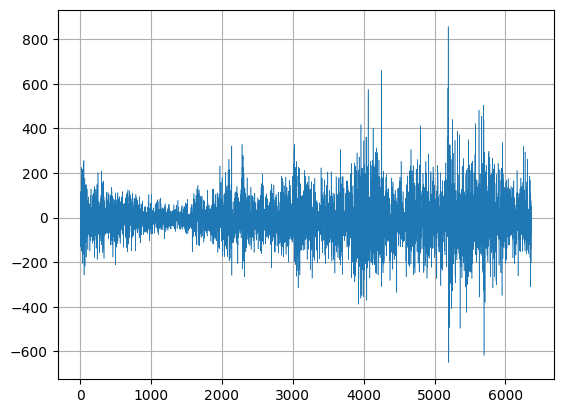

In [24]:
# Plot data
plt.plot(baba_matrix, linewidth=0.4)
plt.grid()
plt.show()

The loss operator can become a very complicated function. The linearised loss operator tackles this problem, but is not as accurate.

**Task 2.5**: Write a function `l_delta(n, x)` for the linearised loss operator $\ell^\Delta_{[n]}$ as in Section 1.2.2. Then, compute the linearised losses $L_{n + 1}^\Delta$ for $n \in \{0, \dots, N - 1\}$ using this function. 

*Useful Python commands*: `np.dot`

In [25]:
# Function delta loss operator
def l_delta(n, x):
    return -np.dot(weighted_port[n,:], x[n,:])

In [26]:
# Set parameters
alpha_weights = [4, 8, 15, 16, 23]
weighted_port = alpha_weights * data_dax_comp

baba_matrix_delta = np.zeros(len(X_n_1))

In [27]:
# Get Losses (with function)
for i in range(len(X_n_1)):
    baba_matrix_delta[i] = l_delta(i, X_n_1)
baba_matrix_delta

array([ 117.87941213,   93.36965531,   -1.77858768, ..., -200.40495814,
         52.6722272 ,  -73.26855834])

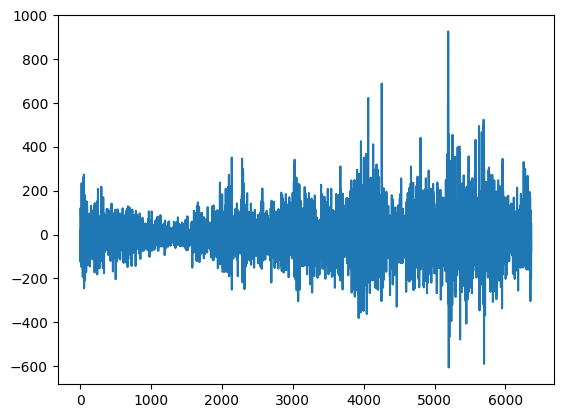

In [28]:
# Plot data
plt.plot(baba_matrix_delta)
plt.show()

**Task 2.6**: Plot the losses and the linearised losses in a common plot. Are the linearised losses a good approximation to the actual losses?

*Useful Python commands*: `plt.plot`

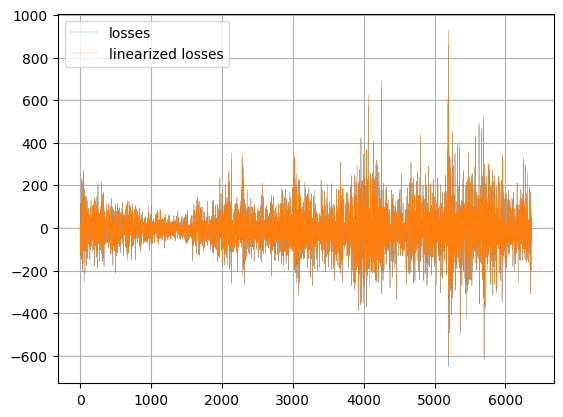

In [29]:
# Plot data

plt.plot(baba_matrix, label="losses", linewidth=0.2)
plt.plot(baba_matrix_delta, label="linearized losses", linewidth=0.2)
plt.legend()
plt.grid()

plt.show()

<br><br>

# Topic 3: Standard Deviation as Risk Measure

Consider the time series of DAX index levels $(S_n)_{n \in \{0, \dots, N\}}$ from Topic 1 and let $(X_{n + 1})_{n \in \{0, \dots, N-1\}}$ denote the corresponding log-returns. Assume as in Task 1.3 that $(X_{n + 1})_{n \in \{0, \dots, N-1\}}$ are iid $N(\mu, \sigma^2)$ distributed 
and implement the standard deviation as risk measure for every day as defined in Section 1.4.6 of the Lecture notes.

**Task 3.1**: If not already done in Topic 1, repeat the tasks 1.1 and 1.3, i.e. import the time series of DAX index levels, compute the log-returns and estimate $\mu$ and $\sigma$.

In [30]:
# Log returns
returns_dax = log_returns(data_dax_comp)

# Get parameters
mu = np.mean(returns_dax)
sigma = np.std(returns_dax)

Now, let $L_{n + 1} = -(S_{n + 1} - S_n) = S_n(1 - e^{X_{n + 1}})$ denote the one-day losses.

**Task 3.2**: Given the information $\mathscr{F}_n$ up to time $n$ (see Section 1.4.5), compute the conditional mean $E_n(L_{n+1})$ and conditional variance $\mathrm{Var}_n(L_{n+1})$. If you are finished you can reveal the answer below to check your results.

*Hint:* If $X \sim N(\mu, \sigma^2)$, then $E(e^X) = \exp(\mu + \frac{\sigma^2}{2})$ and $\mathrm{Var}(e^X) = (\exp(\sigma^2) - 1) \exp(2 \mu + \sigma^2)$.

<details>
  <summary>Answer:</summary>

  We have $L_{n + 1} = S_n(1 - e^{X_{n + 1}}).$ Therefore, $E_n(L_{n+1}) = S_n\big( 1 - \exp(\mu + \frac{\sigma^2}{2})\big)$ and $\mathrm{Var}_n(L_{n+1}) = S_n^2 (\exp(\sigma^2) - 1) \exp(2 \mu + \sigma^2)$.

</details>

<br>

**Task 3.3**: Write a function `rho(n, c)` that computes the standard deviation risk measure $\rho := E_n(L_{n+1}) +  c \sqrt{\mathrm{Var}_n(L_{n+1})}$ at time $n$ with some factor $c > 0$, as suggested in Section 1.4.6.

*Useful Python commands*: `np.exp`, `np.sqrt`

In [45]:
def rho(n, c, mu, sigma):
    cond_mean = n * (1 - np.exp(mu+ sigma**2 / 2))
    cond_var = n**2 * (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
    return cond_mean + c * np.sqrt(cond_var)

In [58]:
len(data)

6310

In [67]:
# compute standard deviation
sd = np.empty(len(data))
c = 0.4

for i in range(len(data)):
    sd[i] = rho(data[i], c, mu, sigma)

**Task 3.4**: Choose some $c > 0$ and compute the risk measures $\rho$ for each $n \in \{0, \dots, N-1\}$ using the function `rho`. Plot the losses $L_{n+1}$ and the risk measures against time in a common plot. Repeat this procedure for different values of $c$. Adjust $c$ so that the value of your risk measure is only violated in rare occurences.

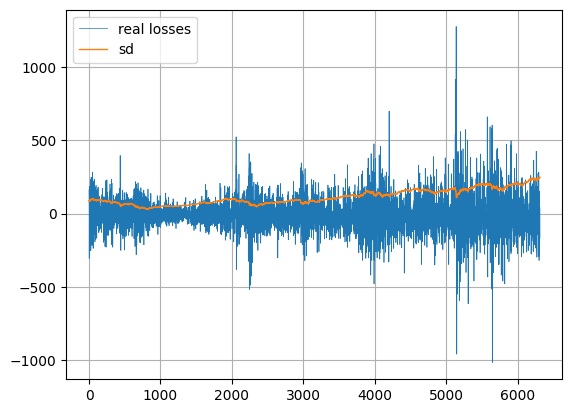

In [68]:
# Output sd
losses = -np.diff(data)
plt.plot(losses, label="real losses", linewidth=0.5)
plt.plot(sd, label="sd", linewidth=1)

plt.legend()
plt.grid()
plt.show()

<br><br>

# Topic 4: Value-at-Risk as Risk Measure

Consider the setting of Example 1.9, where $(S_n)_{n \in \{0, \dots, N\}}$ denotes the stock price process of the BMW stock from Topic 2.

**Task 4.1**: If not already done in Task 2.1, import the BMW stock prices between 03 January 2000 and 11 October 2024 from the file `DAX_companies.csv`.

In [34]:
BMW_data = data_dax_comp[:, 0]

**Task 4.2**: Write a function `VaR(s, mu, sigma, alpha)` that computes the Value-at-Risk at level $\alpha$ for a loss of the form $L_{n+1} = s(1 - e^X)$ as in Example 1.7 using equation (1.5) from the lecture notes.

*Useful Python commands*: `np.exp`. The standard normal inverse cdf $\Phi^{-1}$ can be accessed via `scipy.stats.norm.ppf(...)`.

In [35]:
def VaR(s, mu, sigma, alpha):
    return s * (1 - np.exp(-sigma * stats.norm.ppf(alpha) + mu))

In [36]:
def VaR_delta(s, mu, sigma, alpha):
    return s * (sigma * stats.norm.ppf(alpha) + mu)

**Task 4.3**: Implement Example 1.9 with two modifications: Instead of $S_n = 100$ as in Example 1.9, use the daily stock prices of the BMW stock from the time series. Moreover, instead of fixing $\mu$ and $\sigma^2$ as in the exercise, use estimates of $\mu$ and $\sigma$ computed similarly as in Task 1.3. Compute the corresponding one-day Value-at-Risks from Example 1.9 for each $n \in \{0, \dots, N-1\}$.

*Useful Python commands*: `np.mean`, `np.std`

In [37]:
# Set up parameters
alpha = 0.99
stock_shares = 5

In [38]:
# Get returns
lr_BMW = log_returns(BMW_data)
mu_BMW = np.mean(lr_BMW)
sigma_BMW = np.std(lr_BMW)

In [39]:
# With loss operator
X_n = np.diff(np.log(BMW_data))
losses_BMW_op = BMW_data[1:]*(1-np.exp(X_n))
losses_BMW_op*5

array([ 5.70990166,  2.74459364,  0.44854001, ..., -4.75793339,
        2.77968912,  4.25174843])

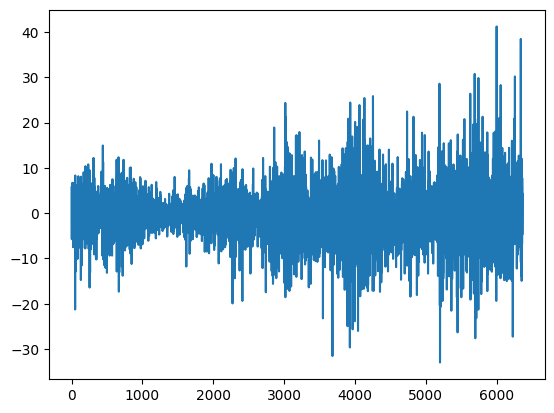

In [40]:
plt.plot(losses_BMW_op*5)

In [41]:
# Without loss operator
losses_BMW = -np.diff(BMW_data) * stock_shares
losses_BMW

array([ 5.95,  2.8 ,  0.45, ..., -4.7 ,  2.8 ,  4.3 ])

In [42]:
# Get VaR
VaR_BMW = np.zeros(len(BMW_data))

for i in range(len(BMW_data)):
    VaR_BMW[i] = stock_shares * VaR(BMW_data[i], mu_BMW, sigma_BMW, alpha) #Ref [Example 1.9] --> with the shares
VaR_BMW

array([ 6.69097668,  6.42097796,  6.29391974, ..., 17.51588335,
       17.38882513, 17.1937    ])

In [43]:
# Get linearised VaR
VaR_delta_BMW = np.zeros(len(BMW_data))

for i in range(len(BMW_data)):
    VaR_delta_BMW[i] = stock_shares * VaR_delta(BMW_data[i], mu_BMW, sigma_BMW, alpha)
VaR_delta_BMW

array([ 6.89127659,  6.61319524,  6.48233342, ..., 18.04023577,
       17.90937395, 17.7084076 ])

**Task 4.4**: Plot the VaR and linearised VaR estimates that you obtained in Task 4.3 in a common plot with the actual (BMW) portfolio losses.

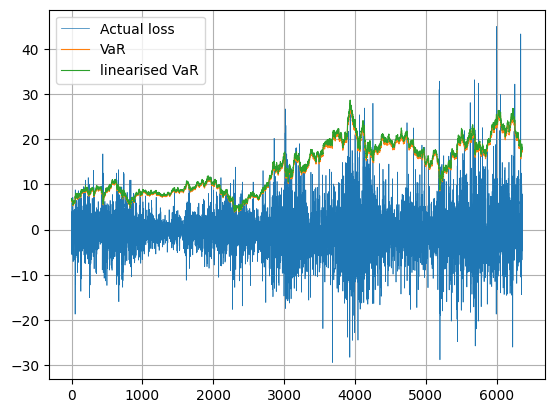

In [44]:
plt.plot(losses_BMW, label="Actual loss", linewidth=0.5)
plt.plot(VaR_BMW, label="VaR", linewidth=0.8)
plt.plot(VaR_delta_BMW, label="linearised VaR", linewidth=0.8)
plt.legend()
plt.grid()

plt.show()